# Compute the MFCCs of two sounds

In [1]:
import librosa

y1, sr1 = librosa.load('./sounds/10.wav')
y2, sr2 = librosa.load('./sounds/78.wav')

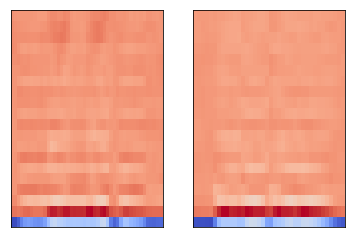

In [2]:
import matplotlib.pyplot as plt
import librosa.display # Must have
%matplotlib inline

plt.subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
librosa.display.specshow(mfcc1)

plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)

In [7]:
# Number of MFCCs: 20 (Librosa default)
print(mfcc1.shape)
print(mfcc2.shape)

(20, 46)
(20, 38)


# Compare them using DTW

In [6]:
from dtw import dtw
from numpy.linalg import norm

dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)

Normalized distance between the two sounds: 192.491546894


In [11]:
cost.shape

(46, 38)

(-0.5, 37.5)

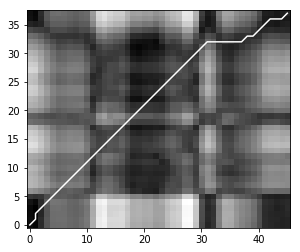

In [9]:
plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))